<a href="https://colab.research.google.com/github/atletlgomez/Dredging-Operations-and-Environmental-Research/blob/main/Dredging_Operations_and_Environmental_Research_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dredging Operations and Enviromental Research

**A database that contains Data about Microplastic Concentrations including Shapes, Sizes and More**

source:

https://doer.el.erdc.dren.mil/microplasticdatabase.html

Most Important Variables

Colors, Continents, Country, Dominant Shape, Dominant Size,

In [183]:
import pandas as pd
import numpy as np
import plotly.express as px
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [184]:
df = pd.read_csv('/content/data.csv')

#Quick Look at Columns and Variables

In [185]:
df.head()

,mpID,Continent,Subdivison,Country,System,Waterbody,Zone Area,Tidal Zone,Test Area,Sample Time,...,Dominant Shapes,Dominant Size,Colors,Polymers,N,MP Stat,Notes,Data Obtained From,Abbrev. Reference,DOI
0,97,Africa,Bizerte,Tunisia,Estuarine,Lagoon of Bizerte,Coastal,Subtidal,Menzel Jemil,2016,...,"fbr, frgmnt",<2 mm,"transparent, white, blue, red, green, black",(Not Applicable),3.0,Mean,NaN,interp_graph; Figure 2,Abidli et al. 2017. The first evaluation of mi...,https://doi.org/10.1007/s11270-017-3439-9
1,98,Africa,Bizerte,Tunisia,Estuarine,Lagoon of Bizerte,Coastal,Subtidal,Carrier Bay,2016,...,"fbr, frgmnt",<2 mm,"transparent, white, blue, red, green, black",(Not Applicable),3.0,Mean,NaN,interp_graph; Figure 2,Abidli et al. 2017. The first evaluation of mi...,https://doi.org/10.1007/s11270-017-3439-9
2,96,Africa,Bizerte,Tunisia,Estuarine,Lagoon of Bizerte,Coastal,Subtidal,Menzel Abderrahmane,2016,...,"fbr, frgmnt",<2 mm,"transparent, white, blue, red, green, black",(Not Applicable),3.0,Mean,NaN,interp_graph; Figure 2,Abidli et al. 2017. The first evaluation of mi...,https://doi.org/10.1007/s11270-017-3439-9
3,99,Africa,Bizerte,Tunisia,Estuarine,Lagoon of Bizerte,Coastal,Subtidal,Channel,2016,...,"fbr, frgmnt",<2 mm,"transparent, white, blue, red, green, black",(Not Applicable),3.0,Mean,NaN,interp_graph; Figure 2,Abidli et al. 2017. The first evaluation of mi...,https://doi.org/10.1007/s11270-017-3439-9
4,762,Africa,Eastern Cape,South Africa,Riverine,Bloukrans River,Bottom,(N/A),Bloukrans River in summer,2016 Feb,...,(N/R),(N/R),(N/R),(Not Applicable),21.0,Mean,NaN,table_text; Page 953,Nel et al. 2018. Sinks and sources: Assessing ...,https://doi.org/10.1016/j.scitotenv.2017.08.298


In [186]:
df.Continent.unique()

array(['Africa', 'Asia', 'Europe', 'North America', 'Oceania'],
      dtype=object)

In [187]:
df.Country.unique()

array(['Tunisia', 'South Africa', 'China', 'Bangladesh', 'Malaysia',
       'India', 'Thailand', 'Iran', 'Japan', 'Denmark', 'Hungary',
       'Ukraine', 'Germany', 'Poland', 'United Kingdom', 'Netherlands',
       'France', 'Spain', 'Russian Federation', 'Italy', 'Norway',
       'Belgium', 'United States', 'Canada', 'New Zealand', 'Australia'],
      dtype=object)

In [188]:
df.columns

Index(['mpID', 'Continent', 'Subdivison', 'Country', 'System', 'Waterbody',
       'Zone Area', 'Tidal Zone', 'Test Area', 'Sample Time',
       'Sediment Sample Method', 'Sediment Depth (cm)', 'Extract Sediment Wt',
       'Extract Method', 'Extract Chemical', 'Extract Oxidizer',
       'No. of Extracts', 'Inspection', 'mp range (µm)', 'mp/kg dw', 'MP Unit',
       'Dominant Shapes', 'Dominant Size', 'Colors', 'Polymers', 'N',
       'MP Stat', 'Notes', 'Data Obtained From', 'Abbrev. Reference', 'DOI'],
      dtype='object')

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   mpID                    1064 non-null   int64  
 1   Continent               1064 non-null   object 
 2   Subdivison              978 non-null    object 
 3   Country                 1064 non-null   object 
 4   System                  1064 non-null   object 
 5   Waterbody               1064 non-null   object 
 6   Zone Area               1064 non-null   object 
 7   Tidal Zone              1064 non-null   object 
 8   Test Area               1064 non-null   object 
 9   Sample Time             1064 non-null   object 
 10  Sediment Sample Method  1064 non-null   object 
 11  Sediment Depth (cm)     1064 non-null   object 
 12  Extract Sediment Wt     1064 non-null   object 
 13  Extract Method          1064 non-null   object 
 14  Extract Chemical        1064 non-null   

In [190]:
df['Zone Area'].unique()

array(['Coastal', 'Bottom', 'Nearshore', 'Limnetic', 'Tidal Riverine',
       'Bank', 'Littoral', 'Dredged Sediment', 'Open Water', 'Tributary',
       'Floodplain'], dtype=object)

In [191]:
df["Sediment Depth (cm)"].unique()

array(['0-3 cm', '0-5 cm', '20-22.5 cm', '2.5-5 cm', '0-15 cm', '8-10 cm',
       '0-2 cm', '4-6 cm', '10-12 cm', '6-8 cm', '12-14 cm', '14-16 cm',
       '2-4 cm', '41-50 cm', '31-40 cm', '21-30 cm', '11-20 cm',
       '0-10 cm', '48-50 cm', '0-6 cm', '78-79 cm', '6-12 cm', '44-46 cm',
       '15-20 cm', '20-25 cm', '25-30 cm', '30-35 cm', '10-15 cm',
       '40-45 cm', '5-10 cm', '35-40 cm', '38-40 cm', '84-88 cm',
       '30-30 cm', '0-1 cm', '70-75 cm', '80-85 cm', '45-50 cm',
       '50-55 cm', '55-60 cm', '90-95 cm', '0-140 cm', '0-150 cm',
       '0-4 cm', '0-2.5 cm', '81-84 cm', '66-69 cm', '69-72 cm',
       '87-90 cm', '72-75 cm', '78-81 cm', '63-66 cm', '84-87 cm',
       '45-48 cm', '75-78 cm', '9-12 cm', '51-54 cm', '42-45 cm',
       '39-42 cm', '36-39 cm', '33-36 cm', '30-33 cm', '27-30 cm',
       '24-27 cm', '21-24 cm', '18-21 cm', '48-51 cm', '12-15 cm',
       '6-9 cm', '3-6 cm', '15-18 cm', '57-60 cm', '54-57 cm', '60-63 cm',
       '0-8 cm', '- cm'], dtype=object)

#Converting the range of Sediment Depth into average between the min and max

Found the Average Sediment Depth (cm)

In [192]:


def calculate_midpoint(depth_range):
    if not isinstance(depth_range, str):
        return np.nan

    try:
        values = [float(v) for v in depth_range.replace(' cm', '').split('-') if v.strip()]
        return sum(values) / len(values) if values else np.nan
    except ValueError:
        return np.nan

df['Average_Sediment_Depth_(cm)'] = df['Sediment Depth (cm)'].apply(calculate_midpoint)

In [193]:
df['Average_Sediment_Depth_(cm)'].unique()

array([ 1.5 ,  2.5 , 21.25,  3.75,  7.5 ,  9.  ,  1.  ,  5.  , 11.  ,
        7.  , 13.  , 15.  ,  3.  , 45.5 , 35.5 , 25.5 , 15.5 , 49.  ,
       78.5 , 45.  , 17.5 , 22.5 , 27.5 , 32.5 , 12.5 , 42.5 , 37.5 ,
       39.  , 86.  , 30.  ,  0.5 , 72.5 , 82.5 , 47.5 , 52.5 , 57.5 ,
       92.5 , 70.  , 75.  ,  2.  ,  1.25, 67.5 , 70.5 , 88.5 , 73.5 ,
       79.5 , 64.5 , 85.5 , 46.5 , 76.5 , 10.5 , 43.5 , 40.5 , 34.5 ,
       31.5 , 28.5 , 19.5 , 49.5 , 13.5 ,  4.5 , 16.5 , 58.5 , 55.5 ,
       61.5 ,  4.  ,   nan])

#Converting Sample Time into Years as a numeric type

As the years go by the amount of Microplastic found on the surface get to a higher Sediment Depth CM

In [194]:
df['Year'] = df['Sample Time'].astype(str).str[-4:]
df['Year'] = pd.to_datetime(df['Year'], errors='coerce')
df['Year'] = df["Year"].dt.year

In [195]:
df.Year.unique()

array([2016.,   nan, 2012., 2021., 2006., 2018., 2020., 2004., 2011.,
       2001., 2014., 2013., 2015., 2017., 2019., 2010.])

#Finding Correlation

In [196]:
df['Average_Sediment_Depth_(cm)'].corr(df['Year'])

np.float64(-0.44082907985503234)

-44 meaning that as the years continue, there is a decrease in the average sediment depth

In [197]:
df.Country.unique()

array(['Tunisia', 'South Africa', 'China', 'Bangladesh', 'Malaysia',
       'India', 'Thailand', 'Iran', 'Japan', 'Denmark', 'Hungary',
       'Ukraine', 'Germany', 'Poland', 'United Kingdom', 'Netherlands',
       'France', 'Spain', 'Russian Federation', 'Italy', 'Norway',
       'Belgium', 'United States', 'Canada', 'New Zealand', 'Australia'],
      dtype=object)

In [198]:
IQR = df["mp/kg dw"].quantile(0.75) - df["mp/kg dw"].quantile(0.25)
lower_bound = df["mp/kg dw"].quantile(0.25) - (IQR * 1.5)
upper_bound = df["mp/kg dw"].quantile(0.75) + (IQR * 1.5)

In [199]:
no_outliers = df[(df["mp/kg dw"] >= lower_bound) & (df["mp/kg dw"] <= upper_bound)]

In [200]:
no_outliers

,mpID,Continent,Subdivison,Country,System,Waterbody,Zone Area,Tidal Zone,Test Area,Sample Time,...,Colors,Polymers,N,MP Stat,Notes,Data Obtained From,Abbrev. Reference,DOI,Average_Sediment_Depth_(cm),Year
0,97,Africa,Bizerte,Tunisia,Estuarine,Lagoon of Bizerte,Coastal,Subtidal,Menzel Jemil,2016,...,"transparent, white, blue, red, green, black",(Not Applicable),3.0,Mean,NaN,interp_graph; Figure 2,Abidli et al. 2017. The first evaluation of mi...,https://doi.org/10.1007/s11270-017-3439-9,1.50,2016.0
3,99,Africa,Bizerte,Tunisia,Estuarine,Lagoon of Bizerte,Coastal,Subtidal,Channel,2016,...,"transparent, white, blue, red, green, black",(Not Applicable),3.0,Mean,NaN,interp_graph; Figure 2,Abidli et al. 2017. The first evaluation of mi...,https://doi.org/10.1007/s11270-017-3439-9,1.50,2016.0
4,762,Africa,Eastern Cape,South Africa,Riverine,Bloukrans River,Bottom,(N/A),Bloukrans River in summer,2016 Feb,...,(N/R),(Not Applicable),21.0,Mean,NaN,table_text; Page 953,Nel et al. 2018. Sinks and sources: Assessing ...,https://doi.org/10.1016/j.scitotenv.2017.08.298,2.50,NaN
5,763,Africa,Eastern Cape,South Africa,Riverine,Bloukrans River,Bottom,(N/A),Bloukrans River in winter,2016 Jul,...,(N/R),(Not Applicable),21.0,Mean,NaN,table_text; Page 953,Nel et al. 2018. Sinks and sources: Assessing ...,https://doi.org/10.1016/j.scitotenv.2017.08.298,2.50,NaN
6,985,Africa,Kwazulu-Natal,South Africa,Marine,Durban Bay,Nearshore,Subtidal,Durban Bay,2012,...,"brown, black, white","polyethylene, polyethylene terephthalate, poly...",1.0,Single,"Durban Bay, South Africa",interp_graph; Figure 7,Matsuguma et al. 2017. Microplastics in sedime...,https://doi.org/10.1007/s00244-017-0414-9,21.25,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059,916,Oceania,Auckland,New Zealand,Riverine,Slippery Creek,Bottom,(N/A),sewage system-Sanitary,2016 Nov,...,"yellow, translucent, black, blue, green","poly(hexadecyl) methacrylate, ethylene/ethyl a...",1.0,Single,mean grain size (micron)-1100,table_text; Table S2-Sli,Dikareva and Simon. 2019. Microplastic polluti...,https://doi.org/10.1016/j.envpol.2019.03.105,2.50,NaN
1060,925,Oceania,Auckland,New Zealand,Riverine,New Market Stream,Bottom,(N/A),sewage system-combined sewer overflow,2016 Nov,...,"yellow, translucent, black, blue, green","poly(hexadecyl) methacrylate, ethylene/ethyl a...",1.0,Single,mean grain size (micron)-1750,table_text; Table S2-New,Dikareva and Simon. 2019. Microplastic polluti...,https://doi.org/10.1016/j.envpol.2019.03.105,2.50,NaN
1061,518,Oceania,Victoria,Australia,Lakes,Multiple wetlands,Littoral,(N/A),wetlands,(N/R),...,(N/R),polyester,15.0,Mean,NaN,"table_text; Page 4, 3.1",Su et al. 2020. Superimposed microplastic poll...,https://doi.org/10.1016/j.watres.2019.115140,1.00,NaN
1062,517,Oceania,Victoria,Australia,Riverine,Multiple streams,Bottom,(N/A),streams,(N/R),...,(N/R),polyester,24.0,Mean,NaN,"table_text; Page 4, 3.1",Su et al. 2020. Superimposed microplastic poll...,https://doi.org/10.1016/j.watres.2019.115140,1.00,NaN


In [201]:
df["mp range (µm)"].unique()

array(['10-5000', '63-5000', '315-5000', '1-5000', '99999-5000',
       '40-5000', '330-5000', '32-5000', '300-5000', '50-5000', '20-5000',
       '1.2-5000', '25-5000', '90-5000', '30-5000', '1000-4000',
       '63-4000', '500-1000', '500-5000', '125-5000', '174-5000',
       '45-5000', '11-5000', '38-5000', '100-5000', '250-5000', '53-5000',
       '355-5000', '80-5000', '45-1000'], dtype=object)

Increase in Microplastic Quantity : Normalize Kilogram of Dry weight over the years found in multiple Countries

In [202]:
fig = px.scatter(no_outliers, x="Year", y="mp/kg dw", color="mp/kg dw")
fig.show()

An increase in findings before *COVID19*


This shows the weight of each count of microplastic found in the years

x = YEARS

y = MPG/ KG DW

In [203]:
average_sediment_by_zone_area = df.groupby('Zone Area')['Average_Sediment_Depth_(cm)'].mean().reset_index()

fig = px.bar(average_sediment_by_zone_area, x='Zone Area', y='Average_Sediment_Depth_(cm)', title='Average Sediment Depth by Zone Area')
fig.show()

The average of all the sediment found in each Zone Area, Coastal, Dredged Sediment and Nearshore and Tidal Riverine

In [204]:
# Filter the grouped data for zone areas with average sediment depth at or below 5 cm
average_sediment_below_5cm = average_sediment_by_zone_area[average_sediment_by_zone_area['Average_Sediment_Depth_(cm)'] <= 5]

# Create the bar graph
fig = px.bar(average_sediment_below_5cm, x='Zone Area', y='Average_Sediment_Depth_(cm)', title='Average Sediment Depth by Zone Area (At or Below 5 cm)')
fig.show()

All three of these Zones have found Microplastics at or below 5cm

Banks - At river banks

Floodplain = flat area of land next to a river

Open Water = Ocean, Lakes, Rivers


In [205]:
average_sediment_above_5cm = average_sediment_by_zone_area[average_sediment_by_zone_area['Average_Sediment_Depth_(cm)'] > 5]

fig = px.bar(average_sediment_above_5cm, x='Zone Area', y='Average_Sediment_Depth_(cm)', title='Average Sediment Depth by Zone Area (Above 5 cm)')
fig.show()

A refined bar graph with only the Microplastic depth above 5 cm,


Coastal (Where the land meets the ocean)

Dredged Sediment (Sediments removed from the bottom of bodies of water)

Tidal Riverine (Rivers influenced by ocean tides)

Littoral (Area near the the shore)



Near the shores over years, the Microplastic has submerged underground

In [206]:
df.groupby("Country")['mp/kg dw'].mean()

,mp/kg dw
Country,
Australia,80.666667
Bangladesh,6318.461538
Belgium,152.000000
Canada,7345.202844
China,2161.089735
Denmark,28.200000
France,428.000000
Germany,780.558333
Hungary,3260.828261


#Bar Graph of the sum of all the Microplastic in the Countries (Dry Weight)

In [207]:
ByCountry = px.bar(no_outliers, x="Country", y="mp/kg dw", color="mp/kg dw", barmode="group")
ByCountry.show()

#Bar Graph of the sum of all the Microplastic in the Continents (Dry Weight)

In [208]:
no_outliers_no_oceania = no_outliers[no_outliers['Continent'] != 'Oceania']

ByContinent_no_oceania = px.bar(no_outliers_no_oceania, x="Continent", y="mp/kg dw", color="mp/kg dw", barmode="group", title="Average Microplastic Concentration by Continent (Outliers and Oceania Removed)")
ByContinent_no_oceania.show()

Continents with the total amount of Microplastic when dry, showing the individual weight by color

#Bar Graph of continents following with three sub bars with Shallow, Deep and Medium

/tmp/ipython-input-3920960477.py:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



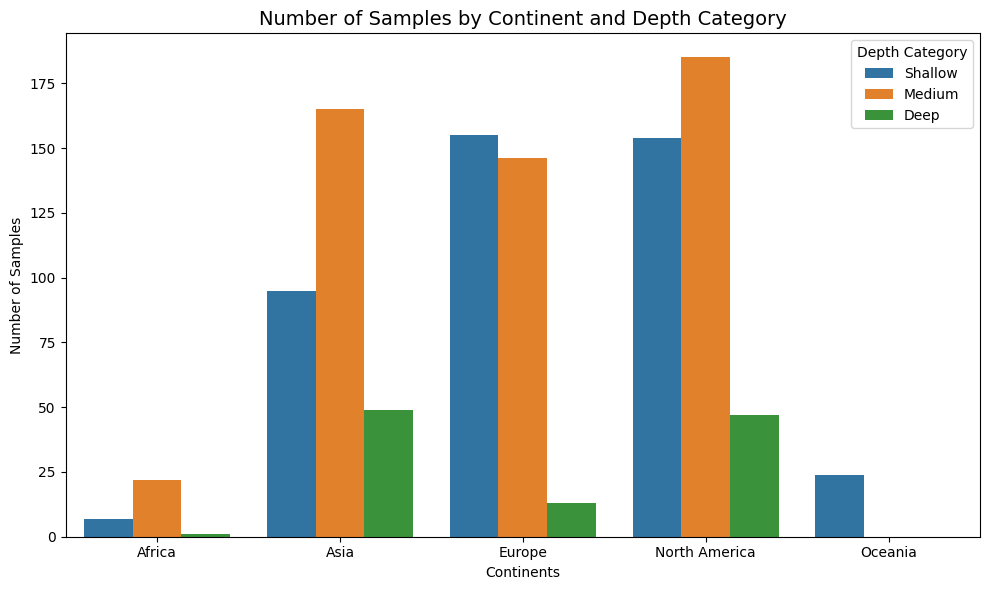

In [209]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define depth bins and labels
bins = [0, 5, 20, float('inf')]
labels = ['Shallow', 'Medium', 'Deep']

# Create the 'Depth Category' column
df['Depth Category'] = pd.cut(df['Average_Sediment_Depth_(cm)'], bins=bins, labels=labels, right=False)

# Group by Continent and Depth Category for counts
grouped_counts = (
    df.groupby(['Continent', 'Depth Category'])
      .size()
      .reset_index(name='Sample Count')
)

# Plot grouped bar chart (counts)
plt.figure(figsize=(10, 6))
sns.barplot(
    data=grouped_counts,
    x='Continent',
    y='Sample Count',
    hue='Depth Category'
)
plt.title('Number of Samples by Continent and Depth Category', fontsize=14)
plt.ylabel('Number of Samples')
plt.xlabel('Continents')
plt.legend(title='Depth Category')
plt.tight_layout()
plt.show()

In the continenets supplied in the data, In the total of all the sample, majority fall into medium and shallow depth

In [210]:

total_counts_by_continent = grouped_counts.groupby('Continent')['Sample Count'].sum().reset_index(name='Total Count')

merged_counts = pd.merge(grouped_counts, total_counts_by_continent, on='Continent')

merged_counts['Percentage'] = (merged_counts['Sample Count'] / merged_counts['Total Count']) * 100


shallow_medium_percentages = merged_counts[merged_counts['Depth Category'].isin(['Shallow', 'Medium'])]


display(shallow_medium_percentages)

,Continent,Depth Category,Sample Count,Total Count,Percentage
0,Africa,Shallow,7,30,23.333333
1,Africa,Medium,22,30,73.333333
3,Asia,Shallow,95,309,30.744337
4,Asia,Medium,165,309,53.398058
6,Europe,Shallow,155,314,49.363057
7,Europe,Medium,146,314,46.496815
9,North America,Shallow,154,386,39.896373
10,North America,Medium,185,386,47.927461
12,Oceania,Shallow,24,24,100.000000
13,Oceania,Medium,0,24,0.000000


#Linear Regression of Average Sediment Depth vs Year

In [211]:
fig_old_depth = px.scatter(df, x="Year", y="Average_Sediment_Depth_(cm)", trendline="ols")
fig_old_depth.show()

#Summary

In [212]:
import statsmodels.api as sm

# Drop rows with NaN values in 'Year' or 'Average Sediment Depth (cm)'
df_cleaned_for_ols = df.dropna(subset=['Year', 'Average_Sediment_Depth_(cm)'])

# Define target (y) and predictor (X)
y = df_cleaned_for_ols['Average_Sediment_Depth_(cm)']
X = df_cleaned_for_ols[['Year']]

# Add a constant (intercept) to the predictor
X = sm.add_constant(X)

# Fit the OLS model
model_year_depth = sm.OLS(y, X).fit()

# Print the model summary
print(model_year_depth.summary())

                                 OLS Regression Results                                
Dep. Variable:     Average_Sediment_Depth_(cm)   R-squared:                       0.194
Model:                                     OLS   Adj. R-squared:                  0.189
Method:                          Least Squares   F-statistic:                     40.04
Date:                         Thu, 14 Aug 2025   Prob (F-statistic):           2.23e-09
Time:                                 02:10:25   Log-Likelihood:                -616.45
No. Observations:                          168   AIC:                             1237.
Df Residuals:                              166   BIC:                             1243.
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

The Average Sediment Depth is decreasing 1.08 cm a year

About 19% of the Average Sediment Depth is explained by the year variable